In [1]:
import numpy as np
import pathlib
import sys
import os
sys.path.append(os.path.abspath('/home/kinga/mnt2'))
sys.path.append(os.path.abspath('/home/kinga/mnt3'))
sys.path.append(os.path.abspath('/home/kinga/mnt4'))
sys.path.append(os.path.abspath('/home/kinga/mnt5'))
import pofah
import sarewt
import dadrah
import anpofah.util.plotting_util as pu
import pofah.jet_sample as js
import matplotlib.pyplot as plt
import anpofah.model_analysis.roc_analysis as roc
import laspaclu.util.string_constants as stco

# read in samples

In [2]:
run_n = 42
input_dir = stco.cluster_out_data_dir+'/run_'+str(run_n)
#input_dir = '/home/kinga/mnt'
fig_dir = '../fig/run_'+str(run_n)
pathlib.Path(fig_dir).mkdir(parents=True, exist_ok=True)

In [32]:
sample_id_qcd = 'qcdSigExt'
sample_id_sig = 'GtoWW35na' #'GtoWW15br' # 'AtoHZ35' 

In [33]:
sample_qcd = js.JetSample.from_input_file(sample_id_qcd, input_dir+'/'+sample_id_qcd+'.h5')
sample_sig = js.JetSample.from_input_file(sample_id_sig, input_dir+'/'+sample_id_sig+'.h5')

In [34]:
# get losses
dist_qcd_cl = sample_qcd['classic_loss']
dist_qcd_qu = sample_qcd['quantum_loss']
dist_sig_cl = sample_sig['classic_loss']
dist_sig_qu = sample_sig['quantum_loss']

In [35]:
# check for numerical integrity
for dd in [dist_qcd_cl, dist_qcd_qu, dist_sig_cl, dist_sig_qu]:
    print(np.isfinite(dd).all())

True
True
True
True


# analysis

In [20]:
import mplhep as hep

#plt.style.use(hep.style.CMS)
plt.style.use('seaborn-whitegrid')
#palette = ['#3E96A1', '#EC4E20', '#FF9505', '#713E5A', '#D62828', '#5F0F40']

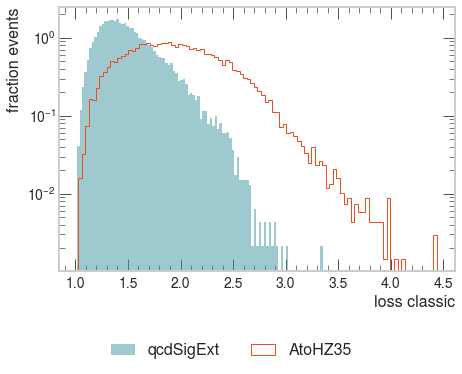

writing figure to ../fig/run_42/loss_classic_qcd_vs_sig.pdf


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [21]:
# plot classic distances
pu.plot_feature_for_n_samples([dist_qcd_cl, dist_sig_cl], sample_names=[sample_id_qcd, sample_id_sig], \
    xlabel='loss classic', plot_name='loss_classic_qcd_vs_sig', fig_dir=fig_dir, bg_name=sample_id_qcd, show_plt=True)

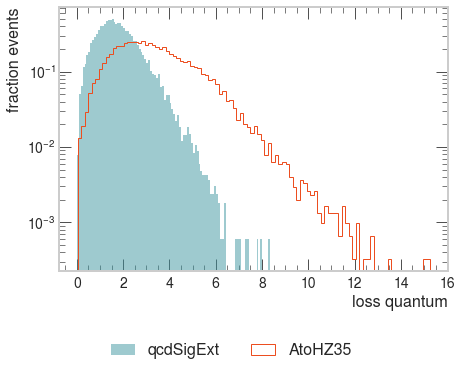

writing figure to ../fig/run_42/loss_quantum_qcd_vs_sig.pdf


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [22]:
plt.style.use(hep.style.CMS)
# plot quantum distances
pu.plot_feature_for_n_samples([dist_qcd_qu, dist_sig_qu], sample_names=[sample_id_qcd, sample_id_sig], \
    xlabel='loss quantum', plot_name='loss_quantum_qcd_vs_sig', fig_dir=fig_dir, bg_name=sample_id_qcd, show_plt=True)

/eos/home-k/kiwoznia/dev/analysis_physics_objects/anpofah/model_analysis/roc_analysis.py:50: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(tpr, 1./fpr, label=label + " (auc " + "{0:.3f}".format(aucs[-1]) + ")", color=color)
/eos/home-k/kiwoznia/dev/analysis_physics_objects/anpofah/model_analysis/roc_analysis.py:50: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(tpr, 1./fpr, label=label + " (auc " + "{0:.3f}".format(aucs[-1]) + ")", color=color)
/eos/home-k/kiwoznia/dev/analysis_physics_objects/anpofah/model_analysis/roc_analysis.py:58: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(np.linspace(0, 1, num=n_rand_class), 1./np.linspace(0, 1, num=n_rand_class), linewidth=1.2, linestyle='--', color='slategrey')


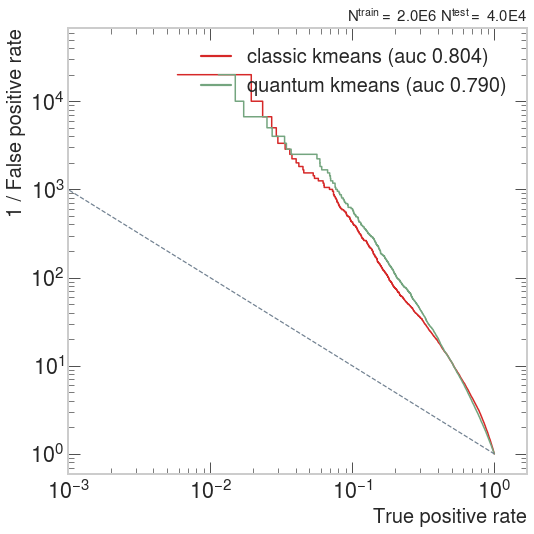

writing ROC plot to ../fig/run_42


[0.8039630037500001, 0.7900115487499999]

In [23]:
# inclusive roc
roc.plot_roc([dist_qcd_cl, dist_qcd_qu], [dist_sig_cl, dist_sig_qu], \
             legend=['classic kmeans', 'quantum kmeans'], \
             plot_name='_'.join(['ROC', sample_id_qcd, 'vs', sample_id_sig, 'kmeans']), \
             xlim=1e-3, fig_dir=fig_dir, show_plt=True, n_train=2e6)

In [14]:
# binned roc
mG=3500
loss_dict = {
    'classic' : losa.LossStrategy(loss_fun=(lambda x : x['classic_loss']), title_str='classic kmeans', file_str='classic_kmeans'),
    'quantum' : losa.LossStrategy(loss_fun=(lambda x : x['quantum_loss']), title_str='quantum kmeans', file_str='quantum_kmeans')
    }
roc.plot_binned_ROC_loss_strategy(sample_qcd, sample_sig, mass_center=mG, strategy_ids=loss_dict.keys(), loss_dict=loss_dict, fig_dir=fig_dir, show_plt=True)


TypeError: plot_roc() got an unexpected keyword argument 'title'